In [315]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [316]:
# Using the Heart Disease Risk dataset
df = pd.read_csv('prelim_datasets/heart_disease_risk.csv')

In [317]:
df.head()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           70000 non-null  float64
 1   Shortness_of_Breath  70000 non-null  float64
 2   Fatigue              70000 non-null  float64
 3   Palpitations         70000 non-null  float64
 4   Dizziness            70000 non-null  float64
 5   Swelling             70000 non-null  float64
 6   Pain_Arms_Jaw_Back   70000 non-null  float64
 7   Cold_Sweats_Nausea   70000 non-null  float64
 8   High_BP              70000 non-null  float64
 9   High_Cholesterol     70000 non-null  float64
 10  Diabetes             70000 non-null  float64
 11  Smoking              70000 non-null  float64
 12  Obesity              70000 non-null  float64
 13  Sedentary_Lifestyle  70000 non-null  float64
 14  Family_History       70000 non-null  float64
 15  Chronic_Stress       70000 non-null 

In [319]:
df.describe()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.499229,0.500586,0.498571,0.498729,0.501414,0.498929,0.501500,0.502457,0.497429,0.499214,0.500643,0.502971,0.499157,0.503543,0.497629,0.499957,0.548929,54.461986,0.500000
std,0.500003,0.500003,0.500002,0.500002,0.500002,0.500002,0.500001,0.499998,0.499997,0.500003,0.500003,0.499995,0.500003,0.499991,0.499998,0.500004,0.497604,16.410794,0.500004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,56.000000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,67.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.000000,1.000000


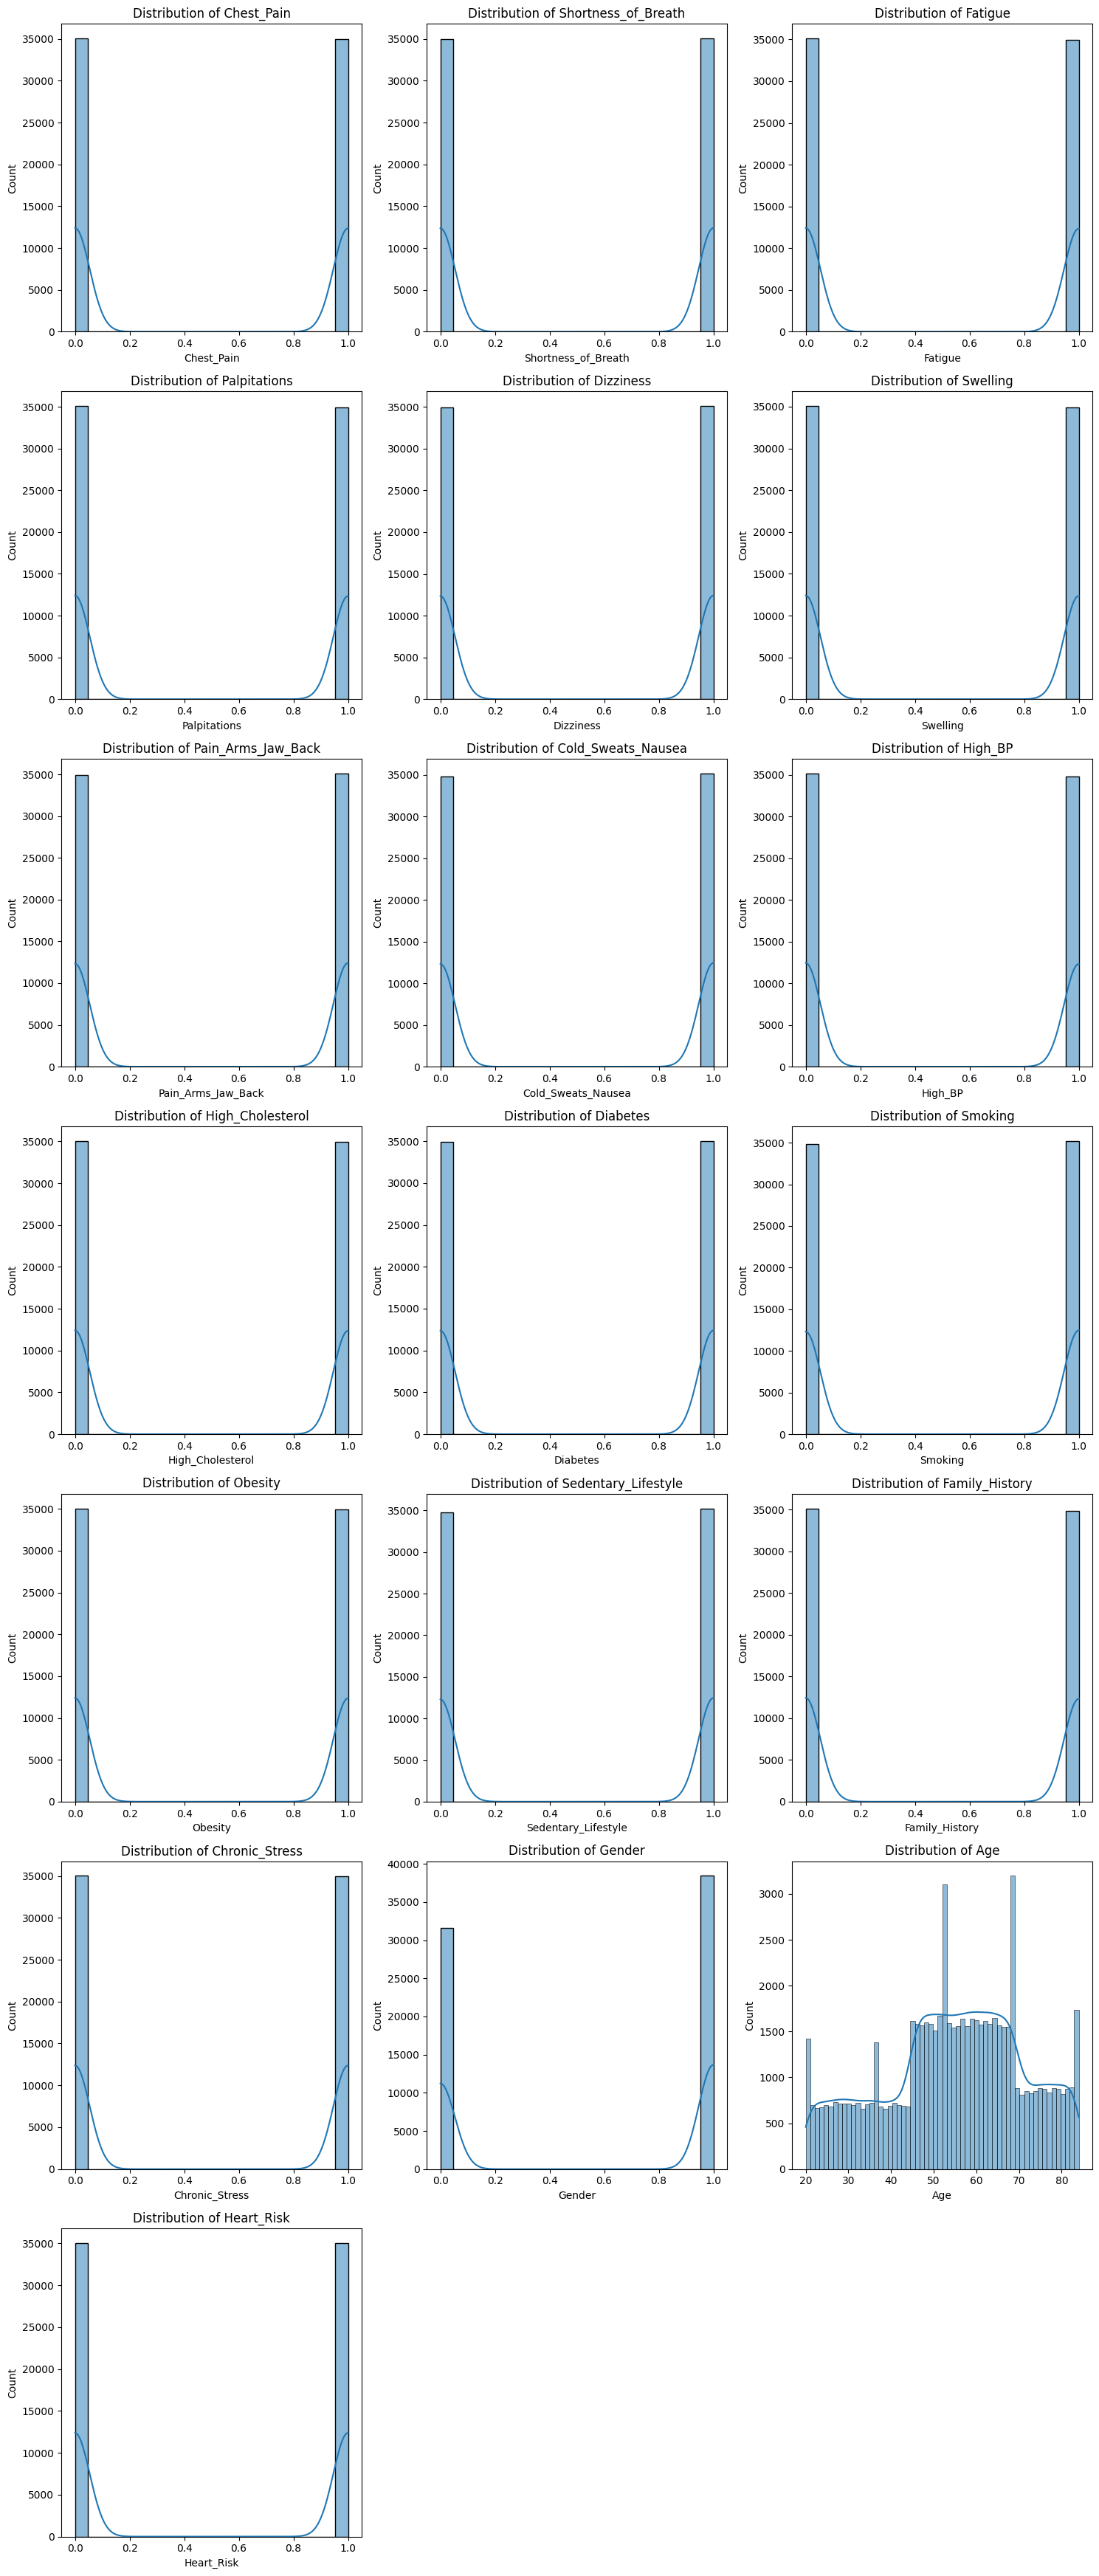

In [320]:
num_cols = len(df.select_dtypes(include=np.number).columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(num_rows, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [321]:
missing_percentage = df.isnull().mean() * 100
print("Missing values percentage:\n", missing_percentage)

Missing values percentage:
 Chest_Pain             0.0
Shortness_of_Breath    0.0
Fatigue                0.0
Palpitations           0.0
Dizziness              0.0
Swelling               0.0
Pain_Arms_Jaw_Back     0.0
Cold_Sweats_Nausea     0.0
High_BP                0.0
High_Cholesterol       0.0
Diabetes               0.0
Smoking                0.0
Obesity                0.0
Sedentary_Lifestyle    0.0
Family_History         0.0
Chronic_Stress         0.0
Gender                 0.0
Age                    0.0
Heart_Risk             0.0
dtype: float64


In [322]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
df_no_duplicates = df.drop_duplicates()

Number of duplicate rows: 6245


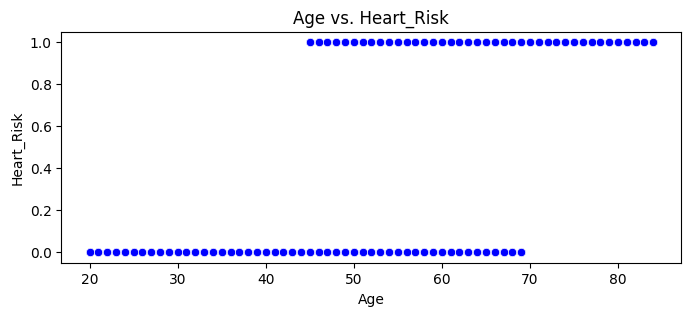

In [323]:
# Setting variables for the regression
independent_var = "Age"
dependent_var = "Heart_Risk"


plt.figure(figsize=(8,3))
sns.scatterplot(x=df_no_duplicates[independent_var], y=df_no_duplicates[dependent_var], color="blue")
plt.xlabel(independent_var)
plt.ylabel(dependent_var)
plt.title(f"{independent_var} vs. {dependent_var}")
plt.show()

In [324]:
# Checks for outliers in the data and removes them

def remove_outliers(df_no_duplicates, columns, threshold=3):
    df_clean = df_no_duplicates.copy()
    for col in columns:
        if pd.api.types.is_numeric_dtype(df_no_duplicates[col]):
            z_scores = np.abs(stats.zscore(df_no_duplicates[col].dropna()))
            outliers = df_no_duplicates[col].dropna()[z_scores > threshold].index
            print(f"Found {len(outliers)} outliers in {col}")
            df_clean.loc[outliers, col] = np.nan
    return df_clean

numerical_cols = df_no_duplicates.select_dtypes(include=np.number).columns
df_no_outliers = remove_outliers(df_no_duplicates, numerical_cols)

Found 0 outliers in Chest_Pain
Found 0 outliers in Shortness_of_Breath
Found 0 outliers in Fatigue
Found 0 outliers in Palpitations
Found 0 outliers in Dizziness
Found 0 outliers in Swelling
Found 0 outliers in Pain_Arms_Jaw_Back
Found 0 outliers in Cold_Sweats_Nausea
Found 0 outliers in High_BP
Found 0 outliers in High_Cholesterol
Found 0 outliers in Diabetes
Found 0 outliers in Smoking
Found 0 outliers in Obesity
Found 0 outliers in Sedentary_Lifestyle
Found 0 outliers in Family_History
Found 0 outliers in Chronic_Stress
Found 0 outliers in Gender
Found 0 outliers in Age
Found 0 outliers in Heart_Risk


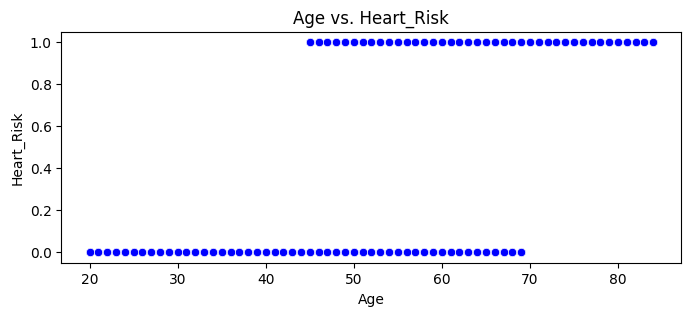

In [325]:
df_cleaned = df_no_outliers.fillna(df_no_outliers.median())

plt.figure(figsize=(8,3))
sns.scatterplot(x=df_cleaned[independent_var], y=df_cleaned[dependent_var], color="blue")
plt.xlabel(independent_var)
plt.ylabel(dependent_var)
plt.title(f"{independent_var} vs. {dependent_var}")
plt.show()

In [326]:
X = df_cleaned[[independent_var]]
Y = df_cleaned[dependent_var]

In [327]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [328]:
print("Training Set:")
print(X_train)
print(Y_train)

print("\nTesting Set:")
print(X_test)
print(Y_test)

Training Set:
        Age
65011  59.0
32806  63.0
32207  45.0
51855  72.0
58700  56.0
...     ...
68598  48.0
40588  26.0
860    84.0
16226  80.0
61404  22.0

[51004 rows x 1 columns]
65011    1.0
32806    1.0
32207    1.0
51855    1.0
58700    0.0
        ... 
68598    1.0
40588    0.0
860      1.0
16226    1.0
61404    0.0
Name: Heart_Risk, Length: 51004, dtype: float64

Testing Set:
        Age
16693  62.0
9286   59.0
36390  51.0
51627  42.0
53487  63.0
...     ...
18689  20.0
60705  55.0
8575   61.0
66588  30.0
56283  63.0

[12751 rows x 1 columns]
16693    1.0
9286     1.0
36390    0.0
51627    0.0
53487    1.0
        ... 
18689    0.0
60705    0.0
8575     0.0
66588    0.0
56283    0.0
Name: Heart_Risk, Length: 12751, dtype: float64


In [329]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [330]:
print(f"Intercept (b): {model.intercept_:.2f}") 
print(f"Coefficient (m): {model.coef_[0]:.2f}") 

Intercept (b): -0.51
Coefficient (m): 0.02


In [331]:
Y_pred = model.predict(X_test)

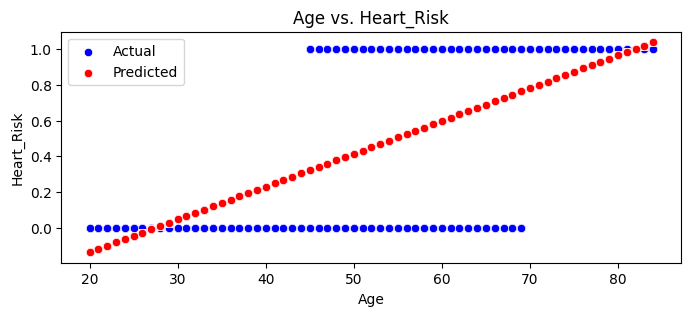

In [332]:
plt.figure(figsize=(8,3))

# Scatter plot of actual salaries
sns.scatterplot(x=X_test.values.flatten(), y=Y_test.values.flatten(), color="blue", label="Actual")

# Scatter plot of predicted salaries
sns.scatterplot(x=X_test.values.flatten(), y=Y_pred.flatten(), color="red", label="Predicted")

plt.xlabel(independent_var)
plt.ylabel(dependent_var)
plt.title(f"{independent_var} vs. {dependent_var}")
plt.legend()
plt.show()

In [333]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
variance = np.var(Y_test)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"{dependent_var} Variance: {variance:.2f}")

Mean Squared Error (MSE): 0.16
R² Score: 0.37
Heart_Risk Variance: 0.25
